In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/MLFlow_PJ/

/content/drive/MyDrive/MLFlow_PJ


In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_csv("application_train.csv")

In [ ]:
df_train = df_train.dropna()

In [ ]:
y = df_train['TARGET']
x = df_train.drop(columns=['TARGET', 'SK_ID_CURR'])



In [ ]:
for c in x.columns:
    col_type = x[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        x[c] = x[c].astype('category')

x.to_csv('./data/interim/x.csv')
y.to_csv('./data/interim/y.csv')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

x_train.to_csv('./data/processed/x_train.csv')
y_train.to_csv('./data/processed/y_train.csv')
x_test.to_csv('./data/processed/x_test.csv')
y_train.to_csv('./data/processed/y_train.csv')

In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(x_train, y_train)

lgb.save(clf, filename='./models/clf.txt')

LGBMClassifier()

In [ ]:
y_pred=clf.predict(x_test)



In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9320


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1603    1]
 [ 116    1]]

True Positives(TP) =  1603

True Negatives(TN) =  1

False Positives(FP) =  1

False Negatives(FN) =  116


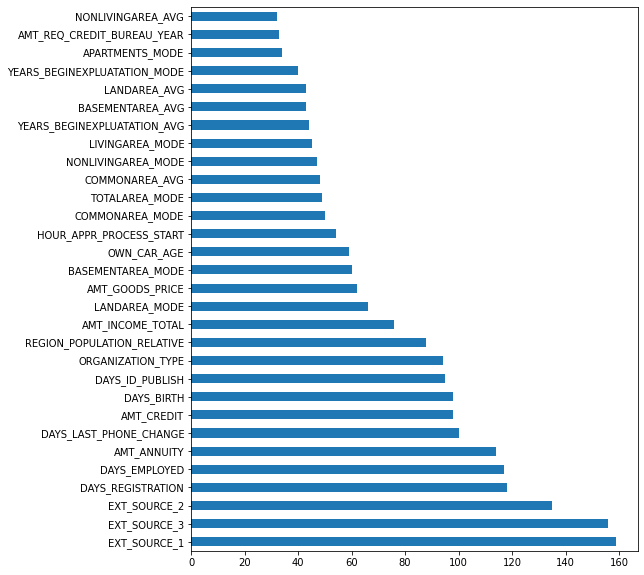

In [ ]:
feat_imp = pd.Series(clf.feature_importances_, index=x.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1604
           1       0.50      0.01      0.02       117

    accuracy                           0.93      1721
   macro avg       0.72      0.50      0.49      1721
weighted avg       0.90      0.93      0.90      1721



array([[0.99491522, 0.00508478],
       [0.98830919, 0.01169081],
       [0.97291474, 0.02708526],
       ...,
       [0.97688301, 0.02311699],
       [0.99152897, 0.00847103],
       [0.72206373, 0.27793627]])